# 영화 리뷰 분류: 이진 분류 예제  
## IMDB데이터셋 

#### 데이터셋 로드

In [1]:

from keras.datasets import imdb #keras 내장 데이터 imdb import

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000) #학습과 검증으로 나뉜 데이터를 각각 변수에 대입, num_words는 빈도수 순 단어 개수를 지정

Using TensorFlow backend.


17465344/17464789 [==============================] - 1s 0us/step


In [2]:
train_data #데이터가 어떻겼는지 살펴보자.

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [3]:
max([max(x) for x in train_data]) # 위에서 num_words 개수를 10000으로 고정했기에 최대값이 9999로 나온다.

9999

In [4]:
word_index = imdb.get_word_index() #임베딩된 값으로 원래 단어를 살펴보자.
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]]) 

1646592/1641221 [==============================] - 0s 0us/step


In [5]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

# 데이터 전처리

#### 신경망에 list는 주입할 수 없다. list를 tensor로 변경해야함

In [0]:
import numpy as np # 다차원 배열 계산기 numpy import

def vectorize_sequences(sequences, dimension = 10000): #dimension은 단어 종류의 개수. 위 num_words의 값과 같다.
  results = np.zeros((len(sequences), dimension)) # 크기가 (len(sequences), dimension)이고 모든 값이 0인 행렬을 생성
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1. #result의 인덱스 값에서 특정 원소 값만 1로 만듬. one_hot_encoding을 함.
  return results 

x_train = vectorize_sequences(train_data) #train 데이터를 벡터화 
x_test = vectorize_sequences(test_data) #test 데이터를 벡터화

In [8]:
len(x_train[0])

10000

In [9]:
np.shape(x_train)

(25000, 10000)

In [0]:
#label은 이미 이진 데이터이므로 데이터 타입만 float형으로 바꿔준다. float는 숫자형 중 소수점을 포함한 숫자형이다. 
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [31]:
from keras import models  #모델
from keras import layers  #레이어
from keras import optimizers  #옵티마이저 

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, ))) #10000개의 입력을 받고 16개의 출력을 갖는 은닉층
model.add(layers.Dense(16, activation='relu'))  #16개의 출력을 갖는 은닉층
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='tanh')) #binary분류 이므로 1개의 출력이 있으면 된다.
model.compile(optimizer=optimizers.RMSprop(lr=0.0001), loss='mse', metrics = ['accuracy']) #모델을 학습할 loss와 optimizer, 정확도를 설정
model.summary() #모델 층을 시각화하기


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 160,577
Trainable params: 160,577
Non-trainable params: 0
_________________________________________________________________


# 훈련 검증

#### training과 validation 나누기

In [0]:
x_val = x_train[:10000]  #10000개 까지 데이터를 validation 셋으로 한다
partial_x_train=x_train[10000:] # 10000 이후 데이터를 train 셋으로 한다.
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


# 모델 훈련

In [32]:
history =  model.fit(partial_x_train, #학습 데이터
                     partial_y_train, # 레이블
                     epochs = 100, #훈련 반복
                     batch_size = 512, #학습 효율을 높이기 위한 batch_size
                     validation_data=(x_val, y_val)) #학습 검증 데이터

Train on 15000 samples, validate on 10000 samples
Epoch 1/100
15000/15000 [==============================] - 1s 89us/step - loss: 0.4221 - accuracy: 0.5043 - val_loss: 0.3429 - val_accuracy: 0.4972
Epoch 2/100
15000/15000 [==============================] - 1s 78us/step - loss: 0.3341 - accuracy: 0.5181 - val_loss: 0.2917 - val_accuracy: 0.5132
Epoch 3/100
15000/15000 [==============================] - 1s 79us/step - loss: 0.3058 - accuracy: 0.5284 - val_loss: 0.2686 - val_accuracy: 0.5336
Epoch 4/100
15000/15000 [==============================] - 1s 80us/step - loss: 0.2891 - accuracy: 0.5496 - val_loss: 0.2519 - val_accuracy: 0.5562
Epoch 5/100
15000/15000 [==============================] - 1s 79us/step - loss: 0.2708 - accuracy: 0.5819 - val_loss: 0.2370 - val_accuracy: 0.5791
Epoch 6/100
15000/15000 [==============================] - 1s 79us/step - loss: 0.2478 - accuracy: 0.6254 - val_loss: 0.2157 - val_accuracy: 0.6159
Epoch 7/100
15000/15000 [==============================] - 1s 

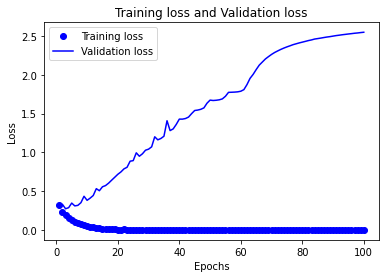

In [15]:
#손실율 그래프 그리기
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss') #'bo'는 파란색 점을 뜻한다.
plt.plot(epochs, val_loss, 'b', label='Validation loss') #'b'는 파란색 선을 뜻한다.
plt.title('Training loss and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

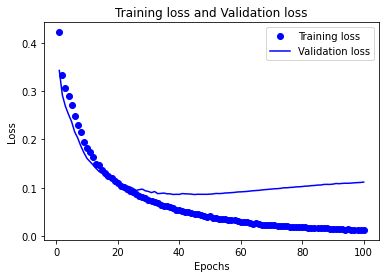

In [33]:
#손실율 그래프 그리기
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss') #'bo'는 파란색 점을 뜻한다.
plt.plot(epochs, val_loss, 'b', label='Validation loss') #'b'는 파란색 선을 뜻한다.
plt.title('Training loss and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

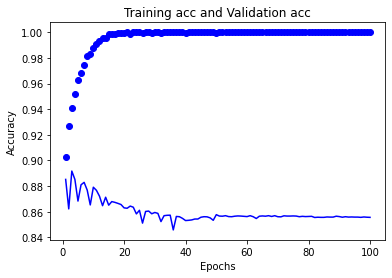

In [20]:
#정확도 그래프 그리기
plt.clf() # 그래프 초기화

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training acc and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

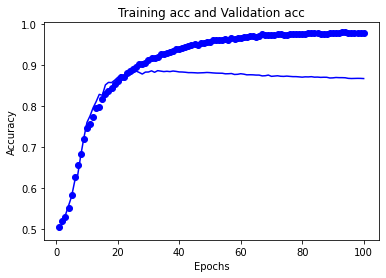

In [34]:
#정확도 그래프 그리기
plt.clf() # 그래프 초기화

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training acc and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [35]:
# test 데이터셋으로 모델 평가
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 92us/step


[0.11988747470378876, 0.8579599857330322]

In [36]:
#test 데이터셋으로 예측하기
model.predict(x_test[:40])

array([[0.029462509],
       [0.99999994],
       [0.99971217],
       [0.96870166],
       [0.99707973],
       [0.99535024],
       [0.99999905],
       [0.024859119],
       [0.99683362],
       [0.99999791],
       [0.98419148],
       [0.021706911],
       [0.031065572],
       [0.010332041],
       [0.99999988],
       [0.022249836],
       [0.97630632],
       [0.69708192],
       [0.034674305],
       [0.031038241],
       [0.99999171],
       [0.99999034],
       [0.034112617],
       [0.99506962],
       [0.99400175],
       [0.99997741],
       [0.017442074],
       [0.96008772],
       [0.99857146],
       [0.028136272],
       [0.99998981],
       [0.029137725],
       [0.99837703],
       [0.040154707],
       [0.023278788],
       [0.038410787],
       [0.99999899],
       [0.99856907],
       [0.019125968],
       [0.03103029]], dtype=float32)